**RAM Check**

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


**Importing the Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


**Importing the Dataset**

In [ ]:
#Training Set
train = pd.read_csv("Final Dataset - 1st Wave Tweets.csv", encoding = "ISO-8859-1")
print(train.describe())

         ScreenName      polarity  subjectivity
count  18798.000000  18799.000000  18799.000000
mean   64814.571497      0.070384      0.382874
std    13980.369709      0.241723      0.272644
min    44953.000000     -1.000000      0.000000
25%    51263.750000     -0.012713      0.166667
50%    64103.000000      0.000000      0.400000
75%    77084.750000      0.200000      0.550000
max    89907.000000      1.000000      1.000000


**Data Pre-Processing**

In [ ]:
#Checking for missing values in OriginalTweet and Sentiment

train1 = train.dropna(axis = 0, subset = [ 'OriginalTweet', 'Sentiment'])
print(train1.isnull().sum())

train1

UserName            0
ScreenName          0
Location         4019
TweetAt             0
OriginalTweet       0
Sentiment           0
polarity            0
subjectivity        0
dtype: int64


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,polarity,subjectivity
0,1,44953.0,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,0.018182,0.477273
1,2,44954.0,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,0.000000,0.000000
2,3,44955.0,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,0.700000,0.800000
3,4,44956.0,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,0.075000,1.000000
4,5,44957.0,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,-0.016667,0.000000
...,...,...,...,...,...,...,...,...
18794,15789,60741.0,NaN,20-03-2020,@barryoleary77 It's pathetic the UK hasn't iss...,Negative,-0.451389,0.680556
18795,38948,83900.0,"Deutschland, EU",08-04-2020,#Germany #Toiletpaper #Coronavirus\r\n\r\nWho ...,Extremely Negative,-0.070000,0.230000
18796,32168,77120.0,Egypt,04-04-2020,Heres why some #Canadian #internet #providers ...,Neutral,0.000000,0.000000
18797,39182,84134.0,USA,09-04-2020,Hi I am a student currently out of work due to...,Positive,-0.062500,0.387500


**Bag of Words Model**

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tweet = [] #To hold cleaned abstract of the Tweets
stemmer = PorterStemmer() #Calling the object

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pip install tweet-preprocessor

In [ ]:
import preprocessor as p

In [ ]:
from preprocessor.api import clean, tokenize, parse

In [ ]:
#import preprocessor as p
#forming a separate feature for cleaned tweets
for a in range(18507):
    x = train1['OriginalTweet'][a]
    train1.loc[a,'OriginalTweet'] = clean(x)

for b in range(18509,18797):
    y = train1['OriginalTweet'][b]
    train1.loc[b, 'OriginalTweet'] = clean(x)    

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
for i in range(18507):
  tw = re.sub('[^a-zA-Z]', ' ' , train1['OriginalTweet'][i]) #Replacing not letters by spaces
  tw = tw.lower() #Converting to LowerCase
  tw = tw.split() #Splitting the Tweet content into words
  tw = [stemmer.stem(word) for word in tw if not word.lower() in set(stopwords.words('english'))] #Excluding Stopwords from Stemming
  tw = ' '.join(tw) #Joining back the stemmed words
  tweet.append(tw) #Adding the processed sentences in new list

for j in range(18508,18797):
  tw = re.sub('[^a-zA-Z]', ' ' , train1['OriginalTweet'][i]) #Replacing not letters by spaces
  tw = tw.lower() #Converting to LowerCase
  tw = tw.split() #Splitting the Abstract into words
  tw = [stemmer.stem(word) for word in tw if not word.lower() in set(stopwords.words('english'))] #Excluding Stopwords from Stemming
  tw = ' '.join(tw) #Joining back the stemmed words
  tweet.append(tw) #Adding the processed abstract in new list



In [ ]:
tweet[1:5]

['find hand sanit fred meyer turn pack purel check concern drive price',
 'find protect love one',
 'buy hit citi anxiou shopper stock food amp medic suppli worker becom st confirm patient stage event',
 'one week everyon buy babi milk powder next everyon buy toilet paper']

**Encoding Sentiment into Categorical Scale**

In [ ]:
pip install category_encoders

     |████████████████████████████████| 80 kB 3.8 MB/s 


In [ ]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Encoding Sentiment into a five-point categorical column

encoder= ce.OrdinalEncoder(cols=['Sentiment'], return_df=True, mapping=[{'col':'Sentiment', 'mapping':{'Extremely Positive':1,'Positive':2,'Neutral':3,'Negative':4,'Extremely Negative':5}}])

train2 = encoder.fit_transform(train1)
train.head(10)
#train2.head(10)

train1['Sentiment'].value_counts()


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Positive              5160
Negative              4640
Neutral               3459
Extremely Positive    2995
Extremely Negative    2543
Name: Sentiment, dtype: int64

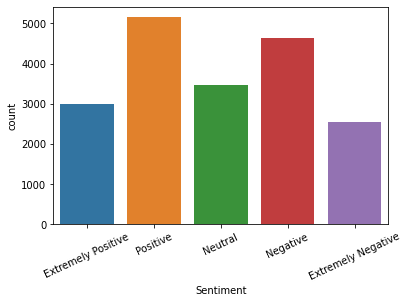

In [ ]:
import seaborn as sns

plot = sns.countplot(x='Sentiment', data=train2).set_xticklabels(labels=['Extremely Positive', 'Positive', 'Neutral', 'Negative','Extremely Negative'], rotation = 25)

Minimising Categories


In [ ]:
def merge_categories(y):
    if y == 1 or y == 2:
        return 1
    elif y == 3:
        return 2
    elif y == 4 or y == 5:
        return 3


In [ ]:
train2["Sentiment"] = train2["Sentiment"].apply(merge_categories)
print(train2.head())


  UserName  ScreenName             Location  ... Sentiment  polarity  subjectivity
0        1     44953.0                  NYC  ...         3  0.018182      0.477273
1        2     44954.0          Seattle, WA  ...         1  0.000000      0.000000
2        3     44955.0                  NaN  ...         1  0.700000      0.800000
3        4     44956.0          Chicagoland  ...         3  0.075000      1.000000
4        5     44957.0  Melbourne, Victoria  ...         2 -0.016667      0.000000

[5 rows x 8 columns]


In [ ]:
train2['Sentiment'].value_counts()


1    8155
3    7183
2    3459
Name: Sentiment, dtype: int64

[Text(0, 0, 'Positive'), Text(0, 0, 'Neutral'), Text(0, 0, 'Negative')]

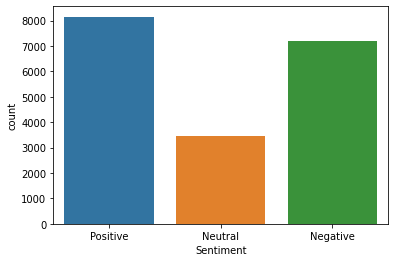

In [ ]:
sns.countplot(x='Sentiment', data=train2).set_xticklabels(labels=['Positive', 'Neutral', 'Negative'], rotation = 0)

**Word Clouds**

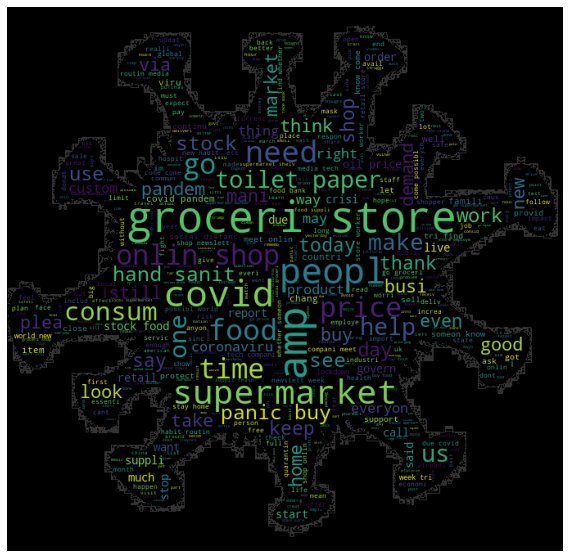

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import requests
import io
response = requests.get("https://res.cloudinary.com/maxie/image/upload/v1617197755/TEMP/covid_ywd7ph.jpg")
image_bytes = io.BytesIO(response. content)
dataset = " ".join(tweet)
def word_cloud(string):
    maskArray = np.array(Image.open(image_bytes))
    cloud = WordCloud(background_color = "black", max_words = 450, mask = maskArray, stopwords = set(STOPWORDS),contour_width=1, contour_color='#333')
    cloud.generate(string)
#     cloud.to_file("wordCloud.png")
    return cloud
dataset = dataset.lower()
wordcloud=word_cloud(dataset)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

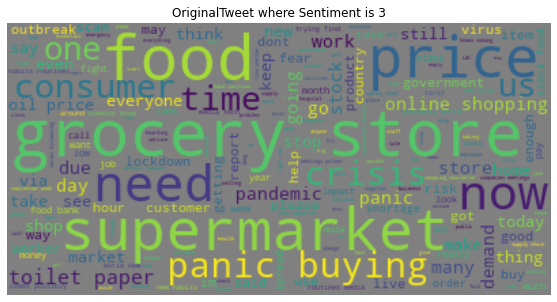

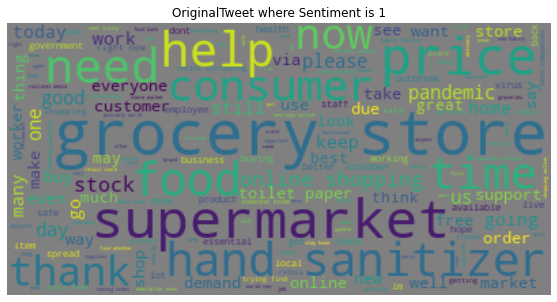

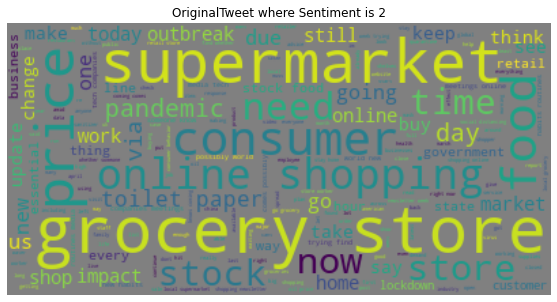

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["https", "amp", "coronavirus", "covid", "covid19", "t", "co", "people", "will"])

for i, target in enumerate(train2['Sentiment'].unique()):
    text = " ".join(tweet for tweet in train2[train2['Sentiment']==target]['OriginalTweet'].str.lower().fillna(''))
    wordcloud = WordCloud(stopwords=stopwords, background_color="grey").generate(text)
    plt.subplots(figsize=(20,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("OriginalTweet where Sentiment is "+str(target))
    plt.axis("off")
    plt.show()



In [ ]:
len(tweet)

18796

#**Implementation using CountVectoriser**

In [ ]:
#Parse Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() #Tokenisation
X = cv.fit_transform(tweet).toarray() #Matrix of features should be in 2d Array for Naive Bayes

#Y = train2.iloc[:, -1].values


In [ ]:
Y = train2['Sentiment'].values

len(Y)

18797

In [ ]:
a = 18507
Y = np.delete(Y,a) 

In [ ]:
type(Y)

numpy.ndarray

**Splitting the Dataset into Training and Test set**

In [ ]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
len(Y_train)

14097

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from sklearn.metrics import plot_confusion_matrix

***Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred_rfc_test = rfc.predict(X_test)
Y_pred_rfc_test

array([1, 3, 1, ..., 3, 3, 1])

In [ ]:
Y_pred_rfc_train = rfc.predict(X_train)
Y_pred_rfc_train

array([1, 2, 2, ..., 3, 1, 2])

*Confusion Matrix and Accuracy Score*


In [ ]:
cm_rfc_test = confusion_matrix(Y_test, Y_pred_rfc_test)
print(cm_rfc_test)

[[1610  162  250]
 [ 170  606   92]
 [ 397  166 1246]]


In [ ]:
cm_rfc_train = confusion_matrix(Y_train, Y_pred_rfc_train)
print(cm_rfc_train)

[[6132    1    0]
 [  41 2550    0]
 [  87    0 5286]]


In [ ]:
print("Accuracy Score of the Random Forest Classifier Model (Training Set):", accuracy_score(Y_train, Y_pred_rfc_train))

Accuracy Score of the Random Forest Classifier Model (Training Set): 0.9908491168333688


In [ ]:
print("Accuracy Score of the Random Forest Classifier Model (Test Set):", accuracy_score(Y_test, Y_pred_rfc_test))

Accuracy Score of the Random Forest Classifier Model (Test Set): 0.7367525005320281


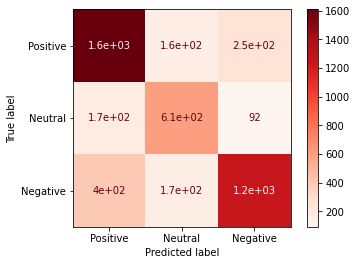

In [ ]:
plot_confusion_matrix(rfc, X_test, Y_test, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap=plt.cm.Reds)

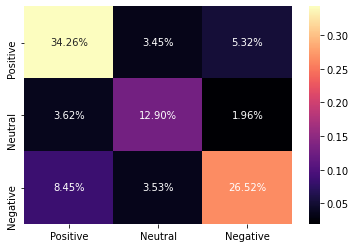

In [ ]:
sns.heatmap(cm_rfc_test/np.sum(cm_rfc_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='magma')

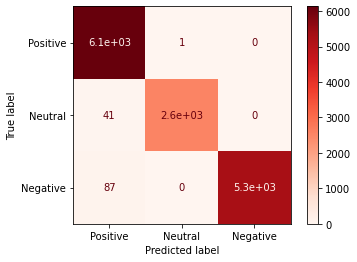

In [ ]:
plot_confusion_matrix(rfc, X_train, Y_train, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap=plt.cm.Reds)

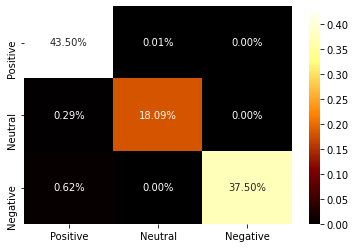

In [ ]:
sns.heatmap(cm_rfc_train/np.sum(cm_rfc_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='afmhot')

**Gaussian Naive Bayes Classifier**

In [ ]:
#Naive Bayes Classifier Model

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred_gnb_test = gnb.predict(X_test)
Y_pred_gnb_test

array([1, 2, 2, ..., 2, 3, 3])

In [ ]:
Y_pred_gnb_train = gnb.predict(X_train)
Y_pred_gnb_train

array([2, 2, 2, ..., 2, 2, 2])

*Scatter Plot - Ignore, for now.*

*Confusion Matrix and Accuracy Score*

In [ ]:
#from sklearn.metrics import confusion_matrix, accuracy_score
cm_gnb_test = confusion_matrix(Y_test, Y_pred_gnb_test)
print(cm_gnb_test)

[[416 781 825]
 [110 536 222]
 [235 637 937]]


In [ ]:
cm_gnb_train = confusion_matrix(Y_train, Y_pred_gnb_train)
print(cm_gnb_train)

[[3054 1633 1446]
 [   0 2591    0]
 [   5 1349 4019]]


Test Set Accuracy

In [ ]:
print("Accuracy Score of the Gaussian Naive Bayes Classifier Model (Test Set):", accuracy_score(Y_test, Y_pred_gnb_test))

Accuracy Score of the Gaussian Naive Bayes Classifier Model (Test Set): 0.40200042562247285


In [ ]:
print("Accuracy Score of the Gaussian Naive Bayes Classifier Model (Train Set):", accuracy_score(Y_train, Y_pred_gnb_train))

Accuracy Score of the Gaussian Naive Bayes Classifier Model (Train Set): 0.6855359296304179


Visualising Confusion Matrix

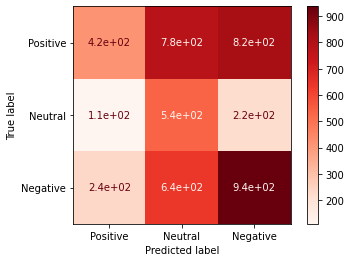

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, Y_test, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap=plt.cm.Reds)

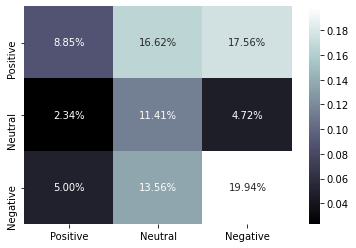

In [ ]:
sns.heatmap(cm_gnb_test/np.sum(cm_gnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='bone')

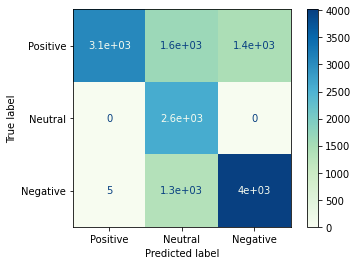

In [ ]:
plot_confusion_matrix(gnb, X_train, Y_train, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap="GnBu")

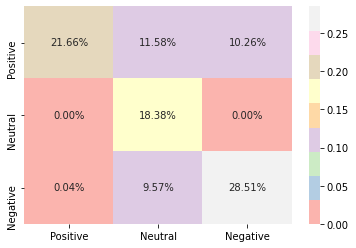

In [ ]:
sns.heatmap(cm_gnb_train/np.sum(cm_gnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='Pastel1')

**Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#from sklearn import metrics
#score = metrics.accuracy_score(predicted, Y_test)

Y_pred_mnb_test = mnb.predict(X_test)
Y_pred_mnb_train = mnb.predict(X_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_mnb_test = confusion_matrix(Y_test, Y_pred_mnb_test)
print(cm_mnb_test)
cm_mnb_train = confusion_matrix(Y_train, Y_pred_mnb_train)
print(cm_mnb_train)

[[1638   64  320]
 [ 452  159  257]
 [ 442   61 1306]]
[[5538   49  546]
 [1007  978  606]
 [ 701   51 4621]]


In [ ]:
print("Accuracy Score of the Multinomial Naive Bayes Classifier Model (Test Set):", accuracy_score(Y_test, Y_pred_mnb_test))
print("Accuracy Score of the Multinomial Naive Bayes Classifier Model (Train Set):", accuracy_score(Y_train, Y_pred_mnb_train))

Accuracy Score of the Multinomial Naive Bayes Classifier Model (Test Set): 0.6603532666524793
Accuracy Score of the Multinomial Naive Bayes Classifier Model (Train Set): 0.7900262467191601


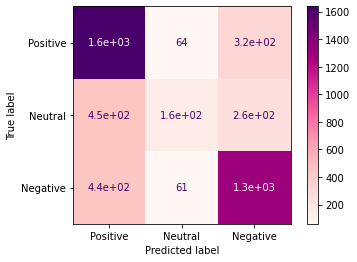

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mnb, X_test, Y_test, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap='RdPu')

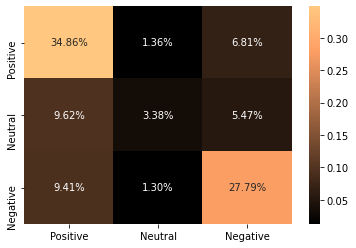

In [ ]:
sns.heatmap(cm_mnb_test/np.sum(cm_mnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='copper')

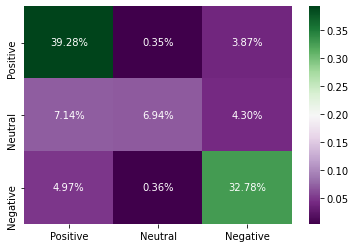

In [ ]:
sns.heatmap(cm_mnb_train/np.sum(cm_mnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='PRGn')

**Bernoulli Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
Y_pred_bnb_test = bnb.predict(X_test)
Y_pred_bnb_train = bnb.predict(X_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_bnb_test = confusion_matrix(Y_test, Y_pred_bnb_test)
print(cm_bnb_test)
cm_bnb_train = confusion_matrix(Y_train, Y_pred_bnb_train)
print(cm_bnb_train)

[[1627   87  308]
 [ 352  333  183]
 [ 454   94 1261]]
[[5552   77  504]
 [ 735 1477  379]
 [ 741  112 4520]]


In [ ]:
print("Accuracy Score of the Bernoulli Naive Bayes Classifier Model (Test Set):", accuracy_score(Y_test, Y_pred_bnb_test))
print("Accuracy Score of the Bernoulli Naive Bayes Classifier Model (Train Set):", accuracy_score(Y_train, Y_pred_bnb_train))

Accuracy Score of the Bernoulli Naive Bayes Classifier Model (Test Set): 0.6854649925516068
Accuracy Score of the Bernoulli Naive Bayes Classifier Model (Train Set): 0.819252323189331


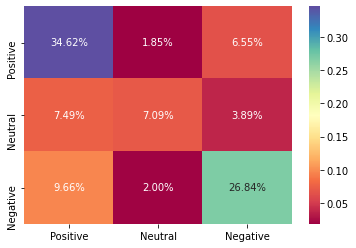

In [ ]:
sns.heatmap(cm_bnb_test/np.sum(cm_bnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='Spectral')

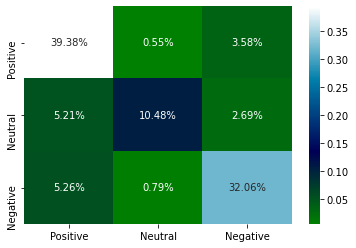

In [ ]:
sns.heatmap(cm_bnb_train/np.sum(cm_bnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='ocean')

**Complement Naive Bayes**

In [ ]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, Y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [ ]:
Y_pred_cnb_test = cnb.predict(X_test)
Y_pred_cnb_train = cnb.predict(X_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_cnb_test = confusion_matrix(Y_test, Y_pred_cnb_test)
print(cm_cnb_test)
cm_cnb_train = confusion_matrix(Y_train, Y_pred_cnb_train)
print(cm_cnb_train)

[[1533  167  322]
 [ 334  294  240]
 [ 311  163 1335]]
[[5393  181  559]
 [ 576 1559  456]
 [ 483  181 4709]]


In [ ]:
print("Accuracy Score of the Complement Naive Bayes Classifier Model (Test Set):", accuracy_score(Y_test, Y_pred_cnb_test))
print("Accuracy Score of the Complement Naive Bayes Classifier Model (Train Set):", accuracy_score(Y_train, Y_pred_cnb_train))

Accuracy Score of the Complement Naive Bayes Classifier Model (Test Set): 0.672909129602043
Accuracy Score of the Complement Naive Bayes Classifier Model (Train Set): 0.8271972760161737


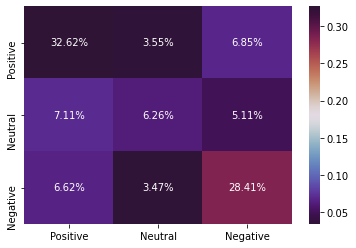

In [ ]:
sns.heatmap(cm_cnb_test/np.sum(cm_cnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='twilight_shifted')

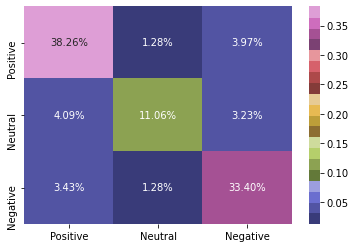

In [ ]:
sns.heatmap(cm_cnb_train/np.sum(cm_cnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='tab20b')

**Support Vector Machine (SVM) Classifier**

In [ ]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred_svm_test = SVM.predict(X_test)
Y_pred_svm_train = SVM.predict(X_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_svm_test = confusion_matrix(Y_test, Y_pred_svm_test)
print(cm_svm_test)
cm_svm_train = confusion_matrix(Y_train, Y_pred_svm_train)
print(cm_svm_train)

[[1647  178  197]
 [ 166  582  120]
 [ 293  203 1313]]
[[5991   46   96]
 [ 110 2439   42]
 [ 158   45 5170]]


In [ ]:
print("Accuracy Score of the Support Vector Machine Classifier Model (Test Set):", accuracy_score(Y_test, Y_pred_svm_test))
print("Accuracy Score of the Support Vector Machine Classifier Model (Train Set):", accuracy_score(Y_train, Y_pred_svm_train))

Accuracy Score of the Complement Naive Bayes Classifier Model (Test Set): 0.7537773994466908
Accuracy Score of the Complement Naive Bayes Classifier Model (Train Set): 0.964744271830886


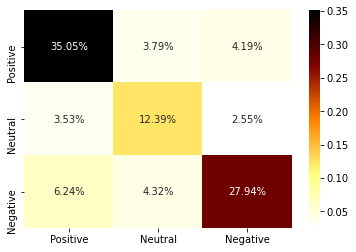

In [ ]:
sns.heatmap(cm_svm_test/np.sum(cm_svm_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='afmhot_r')

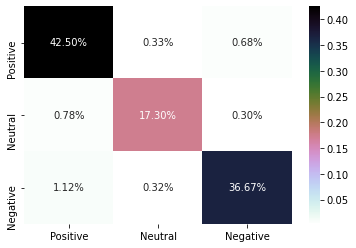

In [ ]:
sns.heatmap(cm_svm_train/np.sum(cm_svm_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='cubehelix_r')

**Adaptive Boosting (AdaBoost) Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 1)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(dt, n_estimators = 100, learning_rate = 1)
clf.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=0)

In [ ]:
Y_pred_ada_test = clf.predict(X_test)
Y_pred_ada_train = clf.predict(X_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_ada_test = confusion_matrix(Y_test, Y_pred_ada_test)
print(cm_ada_test)
cm_ada_train = confusion_matrix(Y_train, Y_pred_ada_train)
print(cm_ada_train)

[[1439  306  277]
 [ 121  581  166]
 [ 322  322 1165]]
[[4510  845  778]
 [ 347 1820  424]
 [ 898  855 3620]]


In [ ]:
print("Accuracy Score of the Adaptive Boosting Model (Test Set):", accuracy_score(Y_test, Y_pred_ada_test))
print("Accuracy Score of the Adaptive Model (Train Set):", accuracy_score(Y_train, Y_pred_ada_train))

Accuracy Score of the Adaptive Boosting Model (Test Set): 0.6778037880400085
Accuracy Score of the Adaptive Model (Train Set): 0.7058239341703909


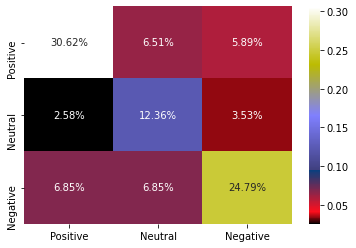

In [ ]:
sns.heatmap(cm_ada_test/np.sum(cm_ada_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='gist_stern')

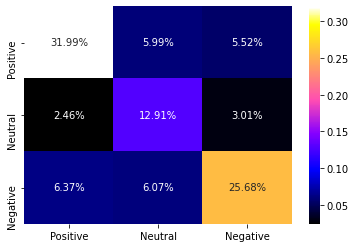

In [ ]:
sns.heatmap(cm_ada_train/np.sum(cm_ada_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='gnuplot2')

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
gb.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
Y_pred_gb_test = gb.predict(X_test)
Y_pred_gb_train = gb.predict(X_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_gb_test = confusion_matrix(Y_test, Y_pred_gb_test)
print(cm_gb_test)
cm_gb_train = confusion_matrix(Y_train, Y_pred_gb_train)
print(cm_gb_train)

[[1603  196  223]
 [ 173  608   87]
 [ 297  186 1326]]
[[5091  436  606]
 [ 458 1884  249]
 [ 920  485 3968]]


In [ ]:
print("Accuracy Score of the Gradient Boosting Classifier Model (Test Set):", accuracy_score(Y_test, Y_pred_gb_test))
print("Accuracy Score of the Gradient Boosting Classifier Model (Train Set):", accuracy_score(Y_train, Y_pred_gb_train))

Accuracy Score of the Gradient Boosting Classifier Model (Test Set): 0.7527133432645243
Accuracy Score of the Gradient Boosting Classifier Model (Train Set): 0.7762644534298078


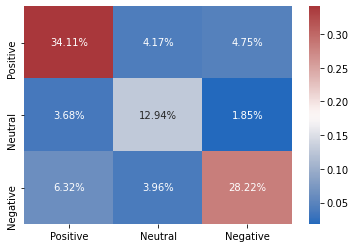

In [ ]:
sns.heatmap(cm_gb_test/np.sum(cm_gb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='vlag')

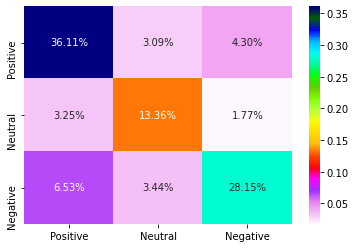

In [ ]:
sns.heatmap(cm_gb_train/np.sum(cm_gb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='gist_ncar_r')

**XGBoost Classifier**

In [ ]:
#from xgboost import XGBClassifier
#xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
Y_pred_xgb_test = xgb.predict(X_test)
Y_pred_xgb_train = xgb.predict(X_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_xgb_test = confusion_matrix(Y_test, Y_pred_xgb_test)
print(cm_xgb_test)
cm_xgb_train = confusion_matrix(Y_train, Y_pred_xgb_train)
print(cm_xgb_train)

[[1720    1  301]
 [ 714    2  152]
 [ 679    2 1128]]
[[5360    1  772]
 [2154   16  421]
 [1853    1 3519]]


In [ ]:
print("Accuracy Score of the XG Boosting Classifier Model (Test Set):", accuracy_score(Y_test, Y_pred_xgb_test))
print("Accuracy Score of the XG Boosting Classifier Model (Train Set):", accuracy_score(Y_train, Y_pred_xgb_train))

Accuracy Score of the XG Boosting Classifier Model (Test Set): 0.6065120238348585
Accuracy Score of the XG Boosting Classifier Model (Train Set): 0.6309853160246861


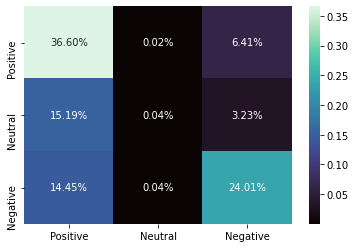

In [ ]:
sns.heatmap(cm_xgb_test/np.sum(cm_xgb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='mako')

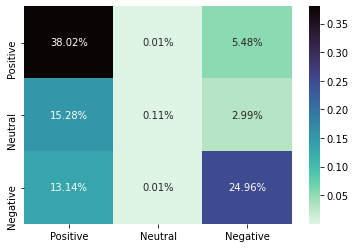

In [ ]:
sns.heatmap(cm_xgb_train/np.sum(cm_xgb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='mako_r')

#**Implementation using TF-IDF**


In [ ]:
tfidf = TfidfVectorizer()

X1 = tfidf.fit_transform(tweet).toarray()
Y1 = train2.iloc[:, -1].values

In [ ]:
Y1 = train2['Sentiment']
Y1

0        3
1        1
2        1
3        3
4        2
        ..
18794    3
18795    3
18796    2
18797    1
18798    3
Name: Sentiment, Length: 18797, dtype: int64

In [ ]:
#Y1_train, Y1_test = train_test_split(Y1, test_size = 0.25, random_state = 0)

In [ ]:
len(Y1)

18797

In [ ]:
a = 18507
#Y1 = np.delete(Y1,a) 

KeyError: ignored

In [ ]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

***Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(X1_train, Y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred_rfc_test = rfc.predict(X1_test)
Y_pred_rfc_test

array([1, 1, 1, ..., 3, 3, 1])

In [ ]:
Y_pred_rfc_train = rfc.predict(X1_train)
Y_pred_rfc_train

array([3, 3, 3, ..., 3, 1, 2])

*Confusion Matrix and Accuracy Score*


In [ ]:
cm_rfc_test = confusion_matrix(Y1_test, Y_pred_rfc_test)
print(cm_rfc_test)

ValueError: ignored

In [ ]:
cm_rfc_train = confusion_matrix(Y1_train, Y_pred_rfc_train)
print(cm_rfc_train)

[[6073    8   31]
 [ 126 2440   26]
 [ 228   12 5153]]


In [ ]:
print("Accuracy Score of the Random Forest Classifier Model (Training Set):", accuracy_score(Y1_train, Y_pred_rfc_train))

Accuracy Score of the Random Forest Classifier Model (Training Set): 0.9694261190324183


In [ ]:
print("Accuracy Score of the Random Forest Classifier Model (Test Set):", accuracy_score(Y1_test, Y_pred_rfc_test))

In [ ]:
plot_confusion_matrix(rfc, X1_test, Y1_test, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap=plt.cm.Reds)

In [ ]:
sns.heatmap(cm_rfc_test/np.sum(cm_rfc_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='magma')

In [ ]:
plot_confusion_matrix(rfc, X1_train, Y1_train, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap=plt.cm.Reds)

In [ ]:
sns.heatmap(cm_rfc_train/np.sum(cm_rfc_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='magma')

**Gaussian Naive Bayes Classifier**

In [ ]:
#Naive Bayes Classifier Model

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X1_train, Y1_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred_gnb_test = gnb.predict(X1_test)
Y_pred_gnb_test

array([1, 2, 2, ..., 2, 3, 3])

In [ ]:
Y_pred_gnb_train = gnb.predict(X1_train)
Y_pred_gnb_train

*Scatter Plot - Ignore, for now.*

*Confusion Matrix and Accuracy Score*

In [ ]:
#from sklearn.metrics import confusion_matrix, accuracy_score
cm_gnb_test = confusion_matrix(Y1_test, Y_pred_gnb_test)
print(cm_gnb_test)

[[473 706 843]
 [157 458 253]
 [306 569 934]]


In [ ]:
cm_gnb_train = confusion_matrix(Y1_train, Y_pred_gnb_train)
print(cm_gnb_train)

In [ ]:
print("Accuracy Score of the Gaussian Naive Bayes Classifier Model (Test Set):", accuracy_score(Y1_test, Y_pred_gnb_test))

Accuracy Score of the Naive Bayes Classifier Model: 0.39689295594807406


In [ ]:
print("Accuracy Score of the Gaussian Naive Bayes Classifier Model (Train Set):", accuracy_score(Y1_train, Y_pred_gnb_train))

Visualising Confusion Matrix

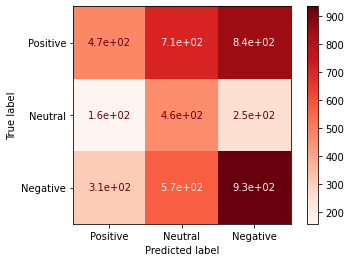

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X1_test, Y1_test, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap=plt.cm.Reds)

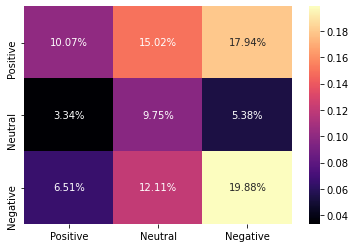

In [ ]:
sns.heatmap(cm_gnb_test/np.sum(cm_gnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='magma')

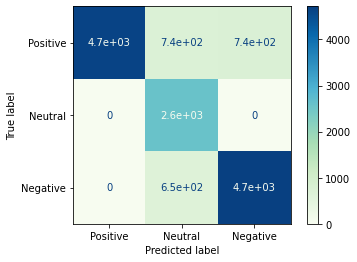

In [ ]:
plot_confusion_matrix(gnb, X1_train, Y1_train, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap="GnBu")

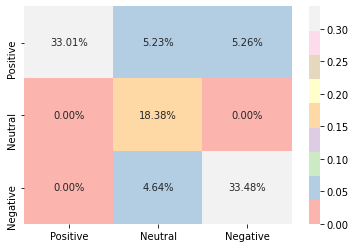

In [ ]:
sns.heatmap(cm_gnb_train/np.sum(cm_gnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='Pastel1')

**Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X1_train, Y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#from sklearn import metrics
#score = metrics.accuracy_score(predicted, Y_test)

Y_pred_mnb_test = mnb.predict(X1_test)
Y_pred_mnb_train = mnb.predict(X1_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_mnb_test = confusion_matrix(Y1_test, Y_pred_mnb_test)
print(cm_mnb_test)
cm_mnb_train = confusion_matrix(Y1_test, Y_pred_mnb_train)
print(cm_mnb_train)

In [ ]:
print("Accuracy Score of the Multinomial Naive Bayes Classifier Model (Test Set):", accuracy_score(Y1_test, Y_pred_mnb_test))
print("Accuracy Score of the Multinomial Naive Bayes Classifier Model (Train Set):", accuracy_score(Y1_train, Y_pred_mnb_train))

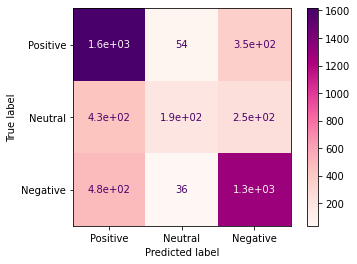

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mnb, X1_test, Y1_test, display_labels=['Positive',
 'Neutral',
 'Negative'], cmap='RdPu')

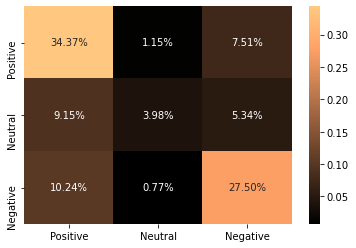

In [ ]:
sns.heatmap(cm_mnb_test/np.sum(cm_mnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='copper')

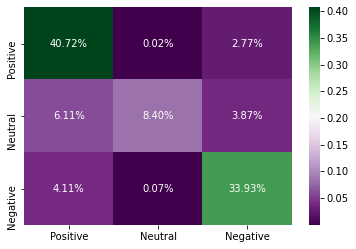

In [ ]:
sns.heatmap(cm_mnb_train/np.sum(cm_mnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='PRGn')

**Bernoulli Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X1_train, Y1_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
Y_pred_bnb_test = bnb.predict(X1_test)
Y_pred_bnb_train = bnb.predict(X1_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_bnb_test = confusion_matrix(Y1_test, Y_pred_bnb_test)
print(cm_bnb_test)
cm_bnb_train = confusion_matrix(Y1_test, Y_pred_bnb_train)
print(cm_bnb_train)

In [ ]:
print("Accuracy Score of the Bernoulli Naive Bayes Classifier Model (Test Set):", accuracy_score(Y1_test, Y_pred_bnb_test))
print("Accuracy Score of the Bernoulli Naive Bayes Classifier Model (Train Set):", accuracy_score(Y1_train, Y_pred_bnb_train))

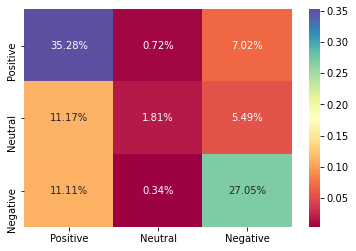

In [ ]:
sns.heatmap(cm_bnb_test/np.sum(cm_bnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='Spectral')

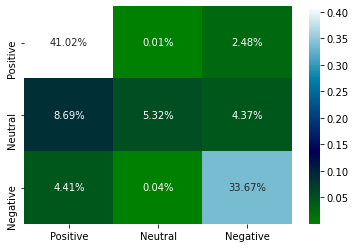

In [ ]:
sns.heatmap(cm_bnb_train/np.sum(cm_bnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='ocean')

**Complement Naive Bayes**

In [ ]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(X1_train, Y1_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_cnb_test = confusion_matrix(Y1_test, Y_pred_cnb_test)
print(cm_cnb_test)
cm_cnb_train = confusion_matrix(Y1_test, Y_pred_cnb_train)
print(cm_cnb_train)

In [ ]:
print("Accuracy Score of the Complement Naive Bayes Classifier Model (Test Set):", accuracy_score(Y1_test, Y_pred_cnb_test))
print("Accuracy Score of the Complement Naive Bayes Classifier Model (Train Set):", accuracy_score(Y1_train, Y_pred_cnb_train))

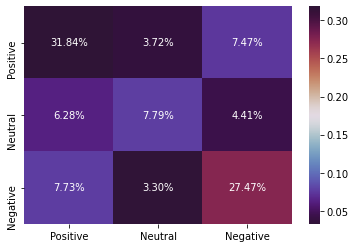

In [ ]:
sns.heatmap(cm_cnb_test/np.sum(cm_cnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='twilight_shifted')

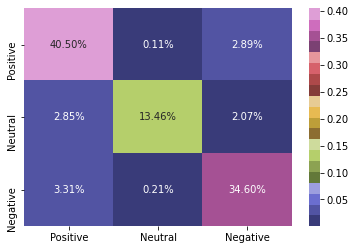

In [ ]:
sns.heatmap(cm_cnb_train/np.sum(cm_cnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='tab20b')

**Support Vector Machine (SVM) Classifier**

In [ ]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X1_train, Y1_train)

In [ ]:
Y_pred_svm_test = SVM.predict(X1_test)
Y_pred_svm_train = SVM.predict(X1_train)

*Confusion Matrix and Accuracy Score*

In [ ]:
cm_svm_test = confusion_matrix(Y1_test, Y_pred_svm_test)
print(cm_svm_test)
cm_svm_train = confusion_matrix(Y1_test, Y_pred_svm_train)
print(cm_svm_train)

In [ ]:
print("Accuracy Score of the Complement Naive Bayes Classifier Model (Test Set):", accuracy_score(Y1_test, Y_pred_svm_test))
print("Accuracy Score of the Complement Naive Bayes Classifier Model (Train Set):", accuracy_score(Y1_train, Y_pred_svm_train))

In [ ]:
sns.heatmap(cm_cnb_test/np.sum(cm_cnb_test), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='twilight_shifted')

In [ ]:
sns.heatmap(cm_cnb_train/np.sum(cm_cnb_train), annot=True, xticklabels = ['Positive', 'Neutral', 'Negative'], yticklabels = ['Positive', 'Neutral', 'Negative'], fmt='.2%', cmap='tab20b')